<a href="https://colab.research.google.com/github/Guerrero-America/MetodosNumericos/blob/main/Polinomio_Interpolante_de_Newton_(SYMPY).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Polinomio Interpolante de Newton con Sypmy**

In [58]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [59]:
def dif_div(x_v, y_v):
    n = len(x_v)
    tabla = [[0] * n for _ in range(n)]

    for i in range(n):
        tabla[i][0] = y_v[i]

    for j in range(1, n):
        for i in range(n - j):
            tabla[i][j] = (tabla[i + 1][j - 1] - tabla[i][j - 1]) / (x_v[i + j] - x_v[i])

    return [tabla[0][j] for j in range(n)]

def polinomio_newton(x_v, y_v):
    x = sp.symbols('x')
    coef = dif_div(x_v,y_v)

    n = len(coef)
    pol = coef[0]
    term = 1

    for i in range(1, n):
        term *= (x - x_v[i - 1])
        pol += coef[i] * term

    return sp.expand(pol)

def h(x_v):
    h = [x_v[i + 1] - x_v[i] for i in range(len(x_v) - 1)]
    return all(sp.Abs(diff - h[0]) < 1e-9 for diff in h)

# Ejemplo de uso
if __name__ == "__main__":
    print("Ingrese los valores de X separados por espacios: ")
    x_v = list(map(float, input().split()))
    print("Ingrese los valores de Y separados por espacios: ")
    y_v = list(map(float, input().split()))

    if len(x_v) != len(y_v):
        print("Error: El número de valores de X y Y debe ser igual.")
    elif not h(x_v):
        print("Error: Los valores de X no están igualmente espaciados.")
    else:
        polinomio = polinomio_newton(x_v, y_v)
        print("El polinomio interpolante de Newton es:")
        print(polinomio)


Ingrese los valores de X separados por espacios: 
0 1 2 3 4 5
Ingrese los valores de Y separados por espacios: 
-5 1 9 25 55 105
El polinomio interpolante de Newton es:
1.0*x**3 - 2.0*x**2 + 7.0*x - 5.0


In [67]:
def polinomio(x):
    return 1*x**3-2*x**2+7*x-5  # polinomio resultante de los siguientes datos X= 0, 1, 2, 3, 4, 5 / Y= -5, 1, 9, 25, 55, 105

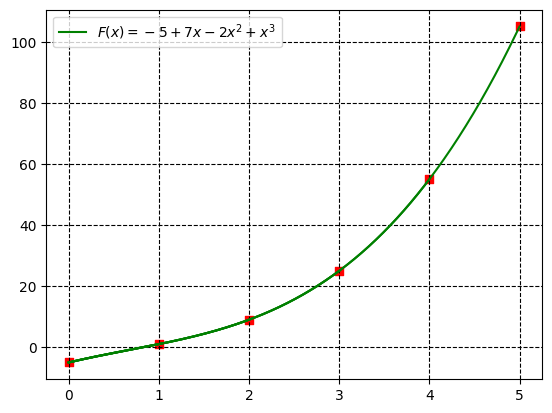

In [70]:
x = np.linspace(0, range(len(x_v)), 1000)
plt.plot(x, polinomio(x), color="green")        # se grafica el polinomio interpolante de newton del ejemplo dada en especifico
plt.legend([r"$F(x)=-5 + 7x - 2x^2 + x^3$"])
plt.scatter(x_v, y_v, marker= 's', color="red")
plt.grid(color="black", linestyle="--")         # ^caracteristicas de los elementos dados por el usuario
plt.show()